# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

In [2]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("dschettler8845/brats-2021-task1")

# print("Path to dataset files:", path)

In [3]:
path = "/home/jyotirya-agrawal/.cache/kagglehub/datasets/dschettler8845/brats-2021-task1/versions/1"
path = os.path.join(path, "BraTS2021_00495")
nii_path = os.path.join(path, "BraTS2021_00495_flair.nii.gz")
mri = nib.load(nii_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (240, 240, 155)


(np.float64(-0.5), np.float64(239.5), np.float64(239.5), np.float64(-0.5))

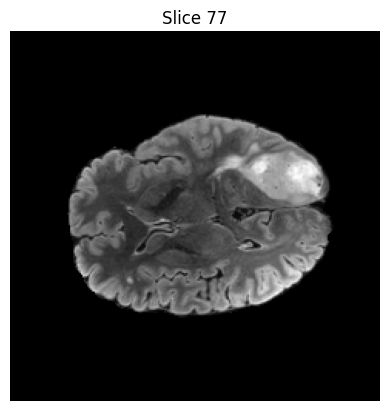

In [4]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [5]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

155

## Normalize a Slice
Normalization improves contrast.

(np.float64(-0.5), np.float64(239.5), np.float64(239.5), np.float64(-0.5))

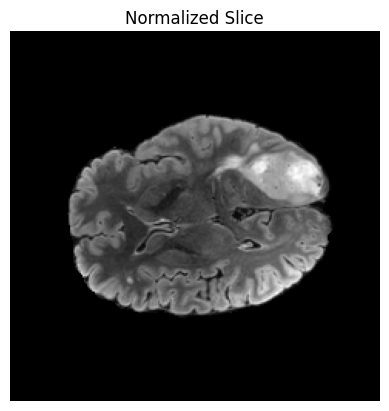

In [6]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

2025-12-21 10:30:13.641668: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-21 10:30:13.926172: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-21 10:30:15.206119: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-21 10:30:16.199128: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

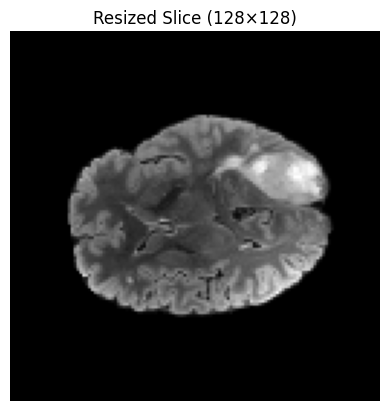

In [7]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.
4. Resize all slices to 128×128 and count how many slices contain tumor pixels (if mask available).


## Solutions to Exercises

### Visualize 5 Slices from Another MRI File

In [8]:
#1
path = "/home/jyotirya-agrawal/.cache/kagglehub/datasets/dschettler8845/brats-2021-task1/versions/1"
path = os.path.join(path, "BraTS2021_00621")
nii_path = os.path.join(path, "BraTS2021_00621_flair.nii.gz")
mri = nib.load(nii_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (240, 240, 155)


Random Slice Indexes: [136  55  84  34 100]


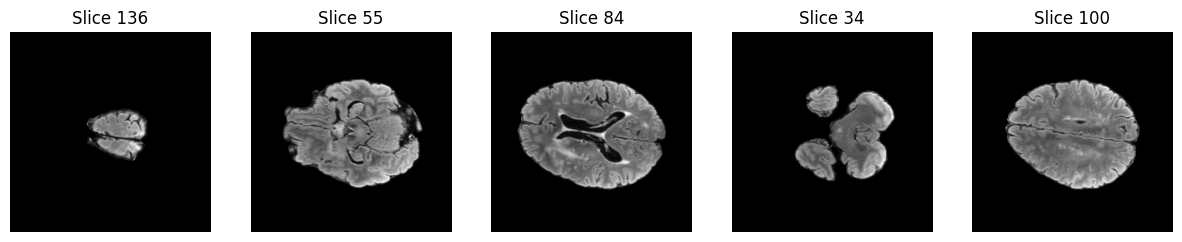

In [25]:
slice_indexes = np.random.randint(0, mri.shape[2], size=5)
print ("Random Slice Indexes:", slice_indexes)
plt.figure(figsize=(15, 5))
for i in slice_indexes:
    plt.subplot(1, 5, slice_indexes.tolist().index(i) + 1)
    plt.imshow(mri[:, :, i], cmap='gray')
    plt.title(f'Slice {i}') 
    plt.axis('off')

### function to plot given slice numbers

In [46]:
def plot_slices(volume, indices, cmap='gray'):
    import matplotlib.pyplot as plt
    n = len(indices)//3+1
    plt.figure(figsize=(9, 3*n))
    for i, idx in enumerate(indices):
        plt.subplot(n, 3, i + 1)
        plt.imshow(volume[:, :, idx], cmap=cmap)
        plt.title(f'Slice {idx}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

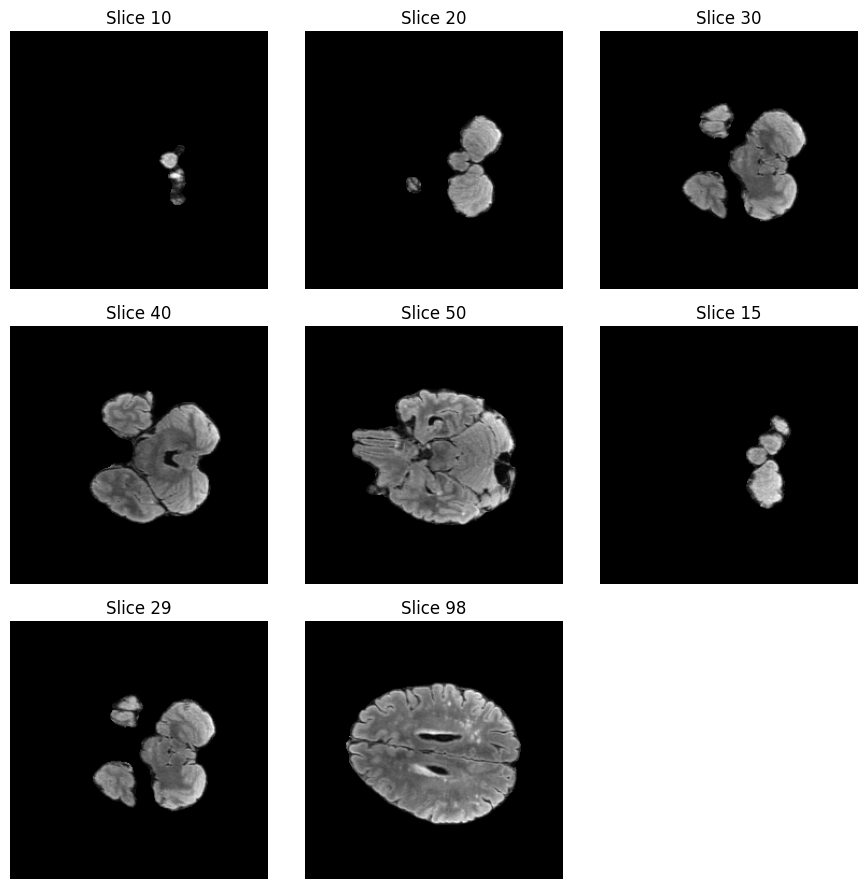

In [47]:
plot_slices(mri, [10, 20, 30, 40, 50, 15, 29, 98])

### Normalising and resizing


In [ ]:
norm_slices = []
resized_slices = []
for i in range(0, mri.shape[2]):
    norm_slice = (mri[:, :, i] - np.min(mri)) / (np.max(mri) - np.min(mri))
    norm_slices.append(norm_slice)
    resized = tf.image.resize(norm_slice[..., None], (128, 128))
    resized_slices.append(resized.numpy().squeeze())

### Counting number of tumor slices:

In [50]:
path = "/home/jyotirya-agrawal/.cache/kagglehub/datasets/dschettler8845/brats-2021-task1/versions/1"
path = os.path.join(path, "BraTS2021_00621")
nii_path = os.path.join(path, "BraTS2021_00621_seg.nii.gz")
mask = nib.load(nii_path).get_fdata()
print('MRI Shape:', mask.shape)

MRI Shape: (240, 240, 155)


In [ ]:
tumor_slices = 0
for i in range(mask.shape[2]):
    if np.any(mask[:, :, i] > 0): 
        tumor_slices += 1

print(f"Number of slices containing tumor pixels: {tumor_slices}")

Number of slices containing tumor pixels: 63
